In [2431]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import re

%matplotlib inline
sns.set(style="whitegrid")

def get_whiskers(a):
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = a[a<=upper_quartile+1.5*iqr].max()
    lower_whisker = a[a>=lower_quartile-1.5*iqr].min()
    return (upper_whisker,lower_whisker)

This notebook describes an attempt of getting the exit signal for any trade.

First things first, read in the .csv into a Pandas dataframe

In [2432]:
df = pd.read_csv("/Users/ernesto/lib/FOREX/tests/data/trend_momentum.csv",sep=',',index_col=False, parse_dates=['start','end'])

# Exploratory analysis of each of the independent variables <a class="anchor" id="first-bullet"></a>

The analysis will consider only the trades having >= 2 candles. I will create a new dataframe composed of these trades and having an additional column that will have the length (number of candles of the trade)

In [2433]:
def get_seq_length(x):
    x=re.sub('\'','',x)
    return(len(x))
df['length'] = df.high.apply(get_seq_length)
filtered_data = df[df.length > 2 ]

Number of trades:

In [2434]:
print(len(filtered_data))

255


## Length of the trade

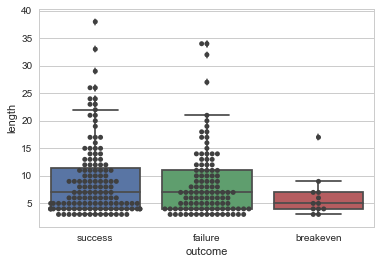

In [2435]:
ax = sns.boxplot(x="outcome", y="length", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="length", data=filtered_data, color=".25")

In [2436]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_length=filtered_data.loc[filtered_data['outcome'] == "success",'length']
failure_length=filtered_data.loc[filtered_data['outcome'] == "failure",'length']

print("Avg length  for success set: %f" % success_length.mean())
print("Avg length for failure set: %f" % failure_length.mean())

#performing paired t-test
stats.ttest_ind(a= success_length,b= failure_length,equal_var=False)

Avg length  for success set: 9.177778
Avg length for failure set: 8.675926


Ttest_indResult(statistic=0.59780245729907178, pvalue=0.55055013498459915)

### Conclusion
These 2 variables (length,outcome) are not associated

## Number of 0s
### High

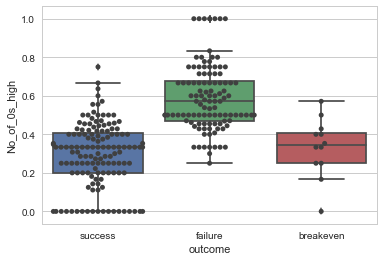

In [2437]:
ax = sns.boxplot(x="outcome", y="No_of_0s_high", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_high", data=filtered_data, color=".25")

In [2438]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_high=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_high']
failure_high=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_high']

print("Avg number of 0s for success set: %f" % success_high.mean())
print("Avg number of 0s for failure set: %f" % failure_high.mean())

#performing paired t-test
stats.ttest_ind(a= success_high,b= failure_high,equal_var=False)

Avg number of 0s for success set: 0.297383
Avg number of 0s for failure set: 0.590256


Ttest_indResult(statistic=-13.467946494831775, pvalue=9.0398174708859095e-31)

### Low

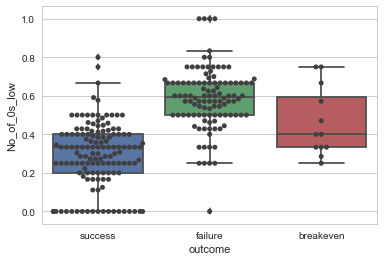

In [2439]:
ax = sns.boxplot(x="outcome", y="No_of_0s_low", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_low", data=filtered_data, color=".25")

In [2440]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_low=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_low']
failure_low=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_low']

print("Avg number of 0s for success set: %f" % success_low.mean())
print("Avg number of 0s for failure set: %f" % failure_low.mean())

#performing paired t-test
stats.ttest_ind(a= success_low,b= failure_low,equal_var=False)

Avg number of 0s for success set: 0.294314
Avg number of 0s for failure set: 0.585622


Ttest_indResult(statistic=-13.855480723476328, pvalue=2.7627503125047824e-32)

### Open

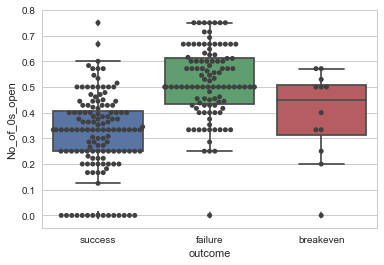

In [2441]:
ax = sns.boxplot(x="outcome", y="No_of_0s_open", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_open", data=filtered_data, color=".25")

In [2442]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_open=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_open']
failure_open=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_open']

print("Avg number of 0s for success set: %f" % success_open.mean())
print("Avg number of 0s for failure set: %f" % failure_open.mean())

#performing paired t-test
stats.ttest_ind(a= success_open,b= failure_open,equal_var=False)

Avg number of 0s for success set: 0.314873
Avg number of 0s for failure set: 0.519407


Ttest_indResult(statistic=-10.911858703644764, pvalue=9.0069318175830964e-23)

### Close

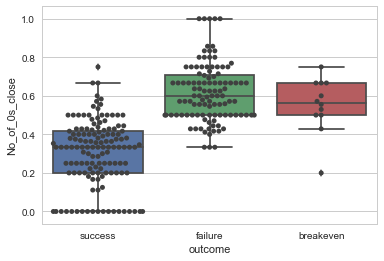

In [2443]:
ax = sns.boxplot(x="outcome", y="No_of_0s_close", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_close", data=filtered_data, color=".25")

In [2444]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_close=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_close']
failure_close=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_close']

print("Avg number of 0s for success set: %f" % success_close.mean())
print("Avg number of 0s for failure set: %f" % failure_close.mean())

#performing paired t-test
stats.ttest_ind(a= success_close,b= failure_close,equal_var=False)

Avg number of 0s for success set: 0.307512
Avg number of 0s for failure set: 0.617270


Ttest_indResult(statistic=-15.083431343522593, pvalue=1.5007452467692373e-36)

### Colour

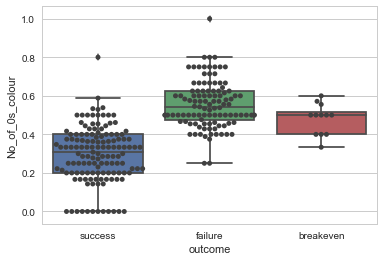

In [2445]:
ax = sns.boxplot(x="outcome", y="No_of_0s_colour", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_colour", data=filtered_data, color=".25")

In [2446]:
succes_coulour=0
failure_colour=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_colour=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_colour']
failure_colour=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_colour']

print("Avg number of 0s for success set: %f" % success_colour.mean())
print("Avg number of 0s for failure set: %f" % failure_colour.mean())

#performing paired t-test
stats.ttest_ind(a= success_colour,b= failure_colour,equal_var=False)

Avg number of 0s for success set: 0.295834
Avg number of 0s for failure set: 0.556426


Ttest_indResult(statistic=-15.215660493677193, pvalue=4.5387429197236384e-37)

### Merge

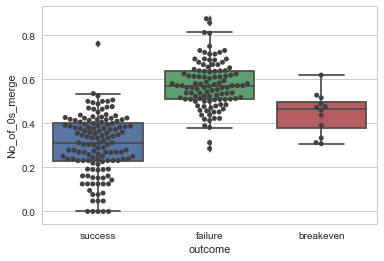

In [2447]:
ax = sns.boxplot(x="outcome", y="No_of_0s_merge", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_merge", data=filtered_data, color=".25")

In [2448]:
succes_merge_all=0
failure_merge_all=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_merge_all=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_merge']
failure_merge_all=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_merge']

print("Avg number of 0s for success set: %f" % success_merge_all.mean())
print("Avg number of 0s for failure set: %f" % failure_merge_all.mean())

#performing paired t-test
stats.ttest_ind(a= success_merge_all,b= failure_merge_all,equal_var=False)

Avg number of 0s for success set: 0.301931
Avg number of 0s for failure set: 0.573088


Ttest_indResult(statistic=-17.575030189124714, pvalue=4.7687077891436797e-45)

And these are the whiskers of the boxplots:

In [2449]:
(s_merged_uwhisker_all,s_merged_lwhisker_all)=get_whiskers(success_merge_all.values)

## double0s
### high_low

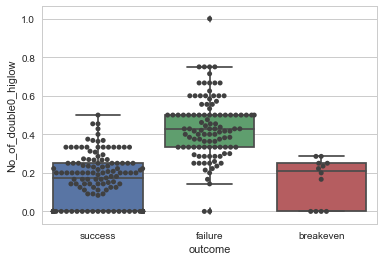

In [2450]:
ax = sns.boxplot(x="outcome", y="No_of_double0_higlow", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_higlow", data=filtered_data, color=".25")

In [2451]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_highlow_all=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_double0_higlow']
failure_highlow_all=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_double0_higlow']

print("Avg number of double 0s for success set: %f" % success_highlow_all.mean())
print("Avg number of double 0s for failure set: %f" % failure_highlow_all.mean())

#performing paired t-test
stats.ttest_ind(a= success_highlow_all,b= failure_highlow_all,equal_var=False)

Avg number of double 0s for success set: 0.161823
Avg number of double 0s for failure set: 0.435103


Ttest_indResult(statistic=-14.296503999668079, pvalue=1.0362871691127868e-32)

And these are the whiskers of the boxplots:

In [2452]:
(s_hl_uwhisker_all,s_hl_lwhisker_all)=get_whiskers(success_highlow_all.values)

### openclose

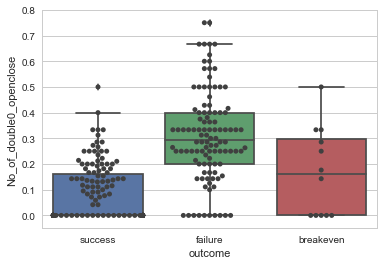

In [2453]:
ax = sns.boxplot(x="outcome", y="No_of_double0_openclose", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_openclose", data=filtered_data, color=".25")

In [2454]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_openclose_all=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_double0_openclose']
failure_openclose_all=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_double0_openclose']

print("Avg number of double 0s for success set: %f" % success_openclose_all.mean())
print("Avg number of double 0s for failure set: %f" % failure_openclose_all.mean())

#performing paired t-test
stats.ttest_ind(a= success_openclose_all,b= failure_openclose_all,equal_var=False)

Avg number of double 0s for success set: 0.086574
Avg number of double 0s for failure set: 0.310498


Ttest_indResult(statistic=-11.581939399622957, pvalue=3.0973232787002159e-23)

And these are the whiskers of the boxplots:

In [2455]:
(s_oc_uwhisker_all,s_oc_lwhisker_all)=get_whiskers(success_openclose_all.values)

## Stretch
### high

outcome       breakeven  failure  success
stretch_high                             
0                     8       19       74
2                     4       28       29
3                     0       36       20
4                     0       16        9
5                     0        7        1
6                     0        1        2
7                     0        1        0


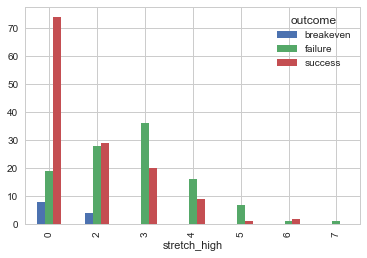

In [2550]:
datatable=pd.crosstab(filtered_data['stretch_high'], filtered_data['outcome'], rownames=['stretch_high'])
print(datatable)
datatable.plot(kind="bar")

In [2457]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_high_all=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_high']
failure_stretch_high_all=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_high']

print("Avg stretch of 0s for success set: %f" % success_stretch_high_all.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_high_all.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_high_all,b=failure_stretch_high_all,equal_var=False)

Avg stretch of 0s for success set: 1.266667
Avg stretch of 0s for failure set: 2.555556


Ttest_indResult(statistic=-6.5217971435195929, pvalue=4.326488141997224e-10)

### low

outcome      breakeven  failure  success
stretch_low                             
0                    6       11       78
2                    4       41       35
3                    2       30       14
4                    0       11        5
5                    0        9        2
6                    0        6        0
7                    0        0        1


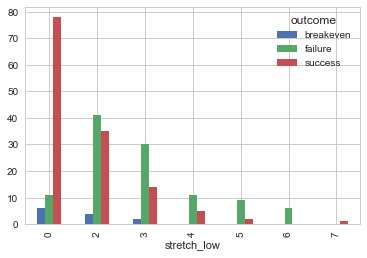

In [2551]:
datatable=pd.crosstab(filtered_data['stretch_low'], filtered_data['outcome'], rownames=['stretch_low'])
print(datatable)
datatable.plot(kind="bar")

In [2459]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_low_all=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_low']
failure_stretch_low_all=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_low']

print("Avg stretch of 0s for success set: %f" % success_stretch_low_all.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_low_all.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_low_all,b=failure_stretch_low_all,equal_var=False)

Avg stretch of 0s for success set: 1.103704
Avg stretch of 0s for failure set: 2.750000


Ttest_indResult(statistic=-8.7034603405959903, pvalue=6.6552102967117223e-16)

### open

outcome       breakeven  failure  success
stretch_open                             
0                     6       22       74
2                     5       42       35
3                     1       27       18
4                     0       13        8
5                     0        3        0
6                     0        1        0


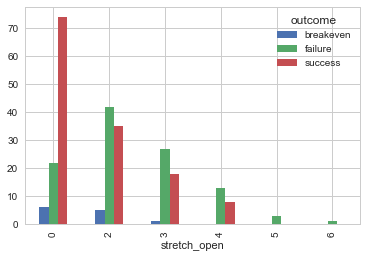

In [2552]:
datatable=pd.crosstab(filtered_data['stretch_open'], filtered_data['outcome'], rownames=['stretch_open'])
print(datatable)
datatable.plot(kind="bar")

In [2461]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_open_all=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_open']
failure_stretch_open_all=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_open']

print("Avg stretch of 0s for success set: %f" % success_stretch_open_all.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_open_all.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_open_all,b=failure_stretch_open_all,equal_var=False)

Avg stretch of 0s for success set: 1.155556
Avg stretch of 0s for failure set: 2.203704


Ttest_indResult(statistic=-5.8972625345472602, pvalue=1.3233721301303208e-08)

### close

outcome        breakeven  failure  success
stretch_close                             
0                      5       10       72
2                      3       44       37
3                      4       28       18
4                      0       14        8
5                      0       10        0
6                      0        1        0
7                      0        1        0


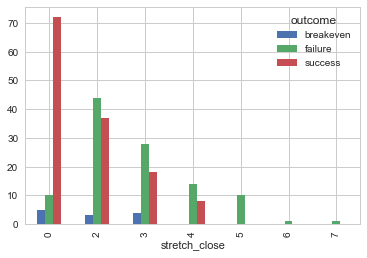

In [2553]:
datatable=pd.crosstab(filtered_data['stretch_close'], filtered_data['outcome'], rownames=['stretch_close'])
print(datatable)
datatable.plot(kind="bar")

In [2463]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_close_all=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_close']
failure_stretch_close_all=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_close']

print("Avg stretch of 0s for success set: %f" % success_stretch_close_all.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_close_all.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_close_all,b=failure_stretch_close_all,equal_var=False)

Avg stretch of 0s for success set: 1.185185
Avg stretch of 0s for failure set: 2.694444


Ttest_indResult(statistic=-8.5323199326295249, pvalue=2.0107504939783045e-15)

### colour

outcome         breakeven  failure  success
stretch_colour                             
0                       6       10       70
2                       1       42       40
3                       5       30       18
4                       0       14        7
5                       0       10        0
6                       0        1        0
7                       0        1        0


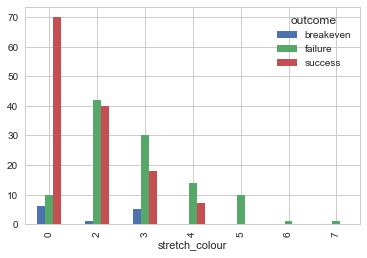

In [2554]:
datatable=pd.crosstab(filtered_data['stretch_colour'], filtered_data['outcome'], rownames=['stretch_colour'])
print(datatable)
datatable.plot(kind="bar")

In [2465]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_colour_all=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_colour']
failure_stretch_colour_all=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_colour']

print("Avg stretch of 0s for success set: %f" % success_stretch_colour_all.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_colour_all.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_colour_all,b=failure_stretch_colour_all,equal_var=False)

Avg stretch of 0s for success set: 1.200000
Avg stretch of 0s for failure set: 2.712963


Ttest_indResult(statistic=-8.630186578784393, pvalue=1.090141506628172e-15)

## Analysis of trend by timeframe

### Daily

In [2466]:
daily_data=filtered_data.loc[filtered_data['timeframe'] == "D"]

The number of records is:

In [2467]:
print(len(daily_data))

47


#### Merge

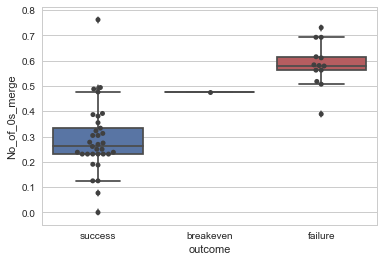

In [2468]:
ax = sns.boxplot(x="outcome", y="No_of_0s_merge", data=daily_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_merge", data=daily_data, color=".25")

In [2469]:
succes_merge_d=0
failure_merge_d=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_merge_d=daily_data.loc[daily_data['outcome'] == "success",'No_of_0s_merge']
failure_merge_d=daily_data.loc[daily_data['outcome'] == "failure",'No_of_0s_merge']

print("Avg number of 0s for success set: %f" % success_merge_d.mean())
print("Avg number of 0s for failure set: %f" % failure_merge_d.mean())

#performing paired t-test
stats.ttest_ind(a= success_merge_d,b= failure_merge_d,equal_var=False)

Avg number of 0s for success set: 0.286631
Avg number of 0s for failure set: 0.586430


Ttest_indResult(statistic=-8.6827518161000903, pvalue=3.9209614732560135e-10)

And these are the whiskers of the boxplots:

In [2470]:
(s_merged_uwhisker_d,s_merged_lwhisker_d)=get_whiskers(success_merge_d.values)

#### double0s
##### high_low

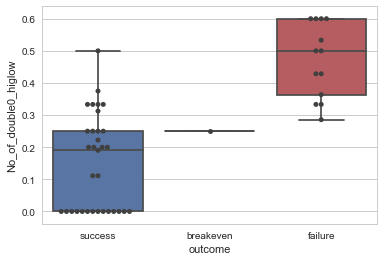

In [2471]:
ax = sns.boxplot(x="outcome", y="No_of_double0_higlow", data=daily_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_higlow", data=daily_data, color=".25")

In [2472]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_highlow_d=daily_data.loc[daily_data['outcome'] == "success",'No_of_double0_higlow']
failure_highlow_d=daily_data.loc[daily_data['outcome'] == "failure",'No_of_double0_higlow']

print("Avg number of double 0s for success set: %f" % success_highlow_d.mean())
print("Avg number of double 0s for failure set: %f" % failure_highlow_d.mean())

#performing paired t-test
stats.ttest_ind(a= success_highlow_d,b= failure_highlow_d,equal_var=False)

Avg number of double 0s for success set: 0.150174
Avg number of double 0s for failure set: 0.469730


Ttest_indResult(statistic=-7.7651720476777362, pvalue=1.7013219261339239e-08)

And these are the whiskers of the boxplots:

In [2473]:
(s_hl_uwhisker_d,s_hl_lwhisker_d)=get_whiskers(success_highlow_d.values)

##### openclose

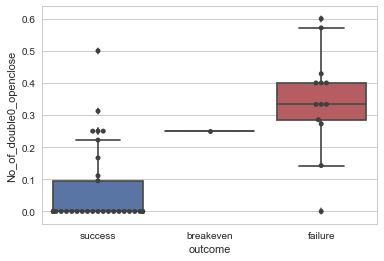

In [2474]:
ax = sns.boxplot(x="outcome", y="No_of_double0_openclose", data=daily_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_openclose", data=daily_data, color=".25")

In [2475]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_openclose_d=daily_data.loc[daily_data['outcome'] == "success",'No_of_double0_openclose']
failure_openclose_d=daily_data.loc[daily_data['outcome'] == "failure",'No_of_double0_openclose']

print("Avg number of double 0s for success set: %f" % success_openclose_d.mean())
print("Avg number of double 0s for failure set: %f" % failure_openclose_d.mean())

#performing paired t-test
stats.ttest_ind(a= success_openclose_d,b= failure_openclose_d,equal_var=False)

Avg number of double 0s for success set: 0.065386
Avg number of double 0s for failure set: 0.346254


Ttest_indResult(statistic=-5.7351480854223933, pvalue=1.9063454288988846e-05)

And these are the whiskers of the boxplots:

In [2476]:
(s_oc_uwhisker_d,s_oc_lwhisker_d)=get_whiskers(success_openclose_d.values)

#### Stretch
##### high

outcome       breakeven  failure  success
stretch_high                             
0                     1        2       23
2                     0        3        6
3                     0        5        3
4                     0        3        1


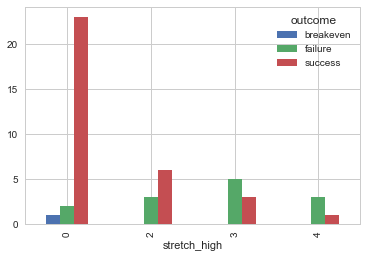

In [2555]:
datatable=pd.crosstab(daily_data['stretch_high'], daily_data['outcome'], rownames=['stretch_high'])
print(datatable)
datatable.plot(kind="bar")

In [2478]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_high_d=daily_data.loc[daily_data['outcome'] == "success",'stretch_high']
failure_stretch_high_d=daily_data.loc[daily_data['outcome'] == "failure",'stretch_high']

print("Avg stretch of 0s for success set: %f" % success_stretch_high_d.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_high_d.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_high_d,b=failure_stretch_high_d,equal_var=False)

Avg stretch of 0s for success set: 0.757576
Avg stretch of 0s for failure set: 2.538462


Ttest_indResult(statistic=-4.1789794742776465, pvalue=0.00044215015331607911)

##### low

outcome      breakeven  failure  success
stretch_low                             
0                    0        1       24
2                    0        7        8
3                    1        2        0
4                    0        2        1
5                    0        1        0


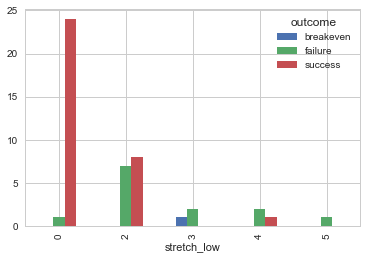

In [2556]:
datatable=pd.crosstab(daily_data['stretch_low'], daily_data['outcome'], rownames=['stretch_low'])
print(datatable)
datatable.plot(kind="bar")

In [2480]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_low_d=daily_data.loc[daily_data['outcome'] == "success",'stretch_low']
failure_stretch_low_d=daily_data.loc[daily_data['outcome'] == "failure",'stretch_low']

print("Avg stretch of 0s for success set: %f" % success_stretch_low_d.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_low_d.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_low_d,b=failure_stretch_low_d,equal_var=False)

Avg stretch of 0s for success set: 0.606061
Avg stretch of 0s for failure set: 2.538462


Ttest_indResult(statistic=-4.8730572712108451, pvalue=0.00010584351913113163)

##### open

outcome       breakeven  failure  success
stretch_open                             
0                     0        1       24
2                     1        6        6
3                     0        5        2
4                     0        1        1


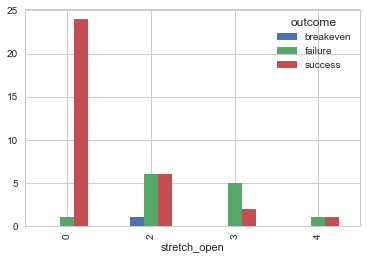

In [2557]:
datatable=pd.crosstab(daily_data['stretch_open'], daily_data['outcome'], rownames=['stretch_open'])
print(datatable)
datatable.plot(kind="bar")

In [2482]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_open_d=daily_data.loc[daily_data['outcome'] == "success",'stretch_open']
failure_stretch_open_d=daily_data.loc[daily_data['outcome'] == "failure",'stretch_open']

print("Avg stretch of 0s for success set: %f" % success_stretch_open_d.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_open_d.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_open_d,b=failure_stretch_open_d,equal_var=False)

Avg stretch of 0s for success set: 0.666667
Avg stretch of 0s for failure set: 2.384615


Ttest_indResult(statistic=-5.132408113453506, pvalue=2.2353428072165932e-05)

##### close

outcome        breakeven  failure  success
stretch_close                             
0                      1        1       24
2                      0        4        6
3                      0        6        2
4                      0        0        1
5                      0        2        0


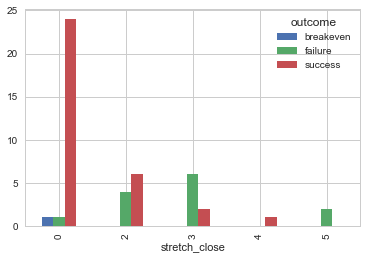

In [2558]:
datatable=pd.crosstab(daily_data['stretch_close'], daily_data['outcome'], rownames=['stretch_close'])
print(datatable)
datatable.plot(kind="bar")

In [2484]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_close_d=daily_data.loc[daily_data['outcome'] == "success",'stretch_close']
failure_stretch_close_d=daily_data.loc[daily_data['outcome'] == "failure",'stretch_close']

print("Avg stretch of 0s for success set: %f" % success_stretch_close_d.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_close_d.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_close_d,b=failure_stretch_close_d,equal_var=False)

Avg stretch of 0s for success set: 0.666667
Avg stretch of 0s for failure set: 2.769231


Ttest_indResult(statistic=-5.081372627976374, pvalue=5.6920135242655952e-05)

##### colour

outcome         breakeven  failure  success
stretch_colour                             
0                       1        1       24
2                       0        4        6
3                       0        7        2
4                       0        0        1
5                       0        1        0


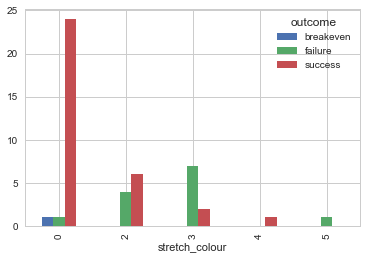

In [2559]:
datatable=pd.crosstab(daily_data['stretch_colour'], daily_data['outcome'], rownames=['stretch_colour'])
print(datatable)
datatable.plot(kind="bar")

In [2486]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_colour_d=daily_data.loc[daily_data['outcome'] == "success",'stretch_colour']
failure_stretch_colour_d=daily_data.loc[daily_data['outcome'] == "failure",'stretch_colour']

print("Avg stretch of 0s for success set: %f" % success_stretch_colour_d.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_colour_d.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_colour_d,b=failure_stretch_colour_d,equal_var=False)

Avg stretch of 0s for success set: 0.666667
Avg stretch of 0s for failure set: 2.615385


Ttest_indResult(statistic=-5.2518212350929465, pvalue=2.5669860924727505e-05)

### H12

In [2487]:
h12_data=filtered_data.loc[filtered_data['timeframe'] == "H12"]

The number of records is:

In [2488]:
print(len(h12_data))

68


#### Merge

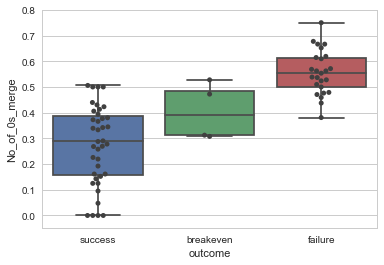

In [2489]:
ax = sns.boxplot(x="outcome", y="No_of_0s_merge", data=h12_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_merge", data=h12_data, color=".25")

In [2490]:
succes_merge_h12=0
failure_merge_h12=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_merge_h12=h12_data.loc[h12_data['outcome'] == "success",'No_of_0s_merge']
failure_merge_h12=h12_data.loc[h12_data['outcome'] == "failure",'No_of_0s_merge']

print("Avg number of 0s for success set: %f" % success_merge_h12.mean())
print("Avg number of 0s for failure set: %f" % failure_merge_h12.mean())

#performing paired t-test
stats.ttest_ind(a= success_merge_h12,b= failure_merge_h12,equal_var=False)

Avg number of 0s for success set: 0.273526
Avg number of 0s for failure set: 0.556580


Ttest_indResult(statistic=-9.4534963912210142, pvalue=1.4156329821364174e-13)

And these are the whiskers of the boxplots:

In [2491]:
(s_merged_uwhisker_h12,s_merged_lwhisker_h12)=get_whiskers(success_merge_h12.values)

#### double0s
##### high_low

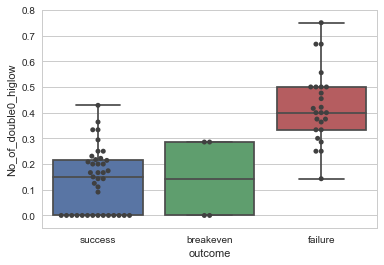

In [2492]:
ax = sns.boxplot(x="outcome", y="No_of_double0_higlow", data=h12_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_higlow", data=h12_data, color=".25")

In [2493]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_highlow_h12=h12_data.loc[h12_data['outcome'] == "success",'No_of_double0_higlow']
failure_highlow_h12=h12_data.loc[h12_data['outcome'] == "failure",'No_of_double0_higlow']

print("Avg number of double 0s for success set: %f" % success_highlow_h12.mean())
print("Avg number of double 0s for failure set: %f" % failure_highlow_h12.mean())

#performing paired t-test
stats.ttest_ind(a= success_highlow_h12,b= failure_highlow_h12,equal_var=False)

Avg number of double 0s for success set: 0.138016
Avg number of double 0s for failure set: 0.424649


Ttest_indResult(statistic=-8.3718746649539355, pvalue=7.5743790312027887e-11)

And these are the whiskers of the boxplots:

In [2494]:
(s_hl_uwhisker_h12,s_hl_lwhisker_h12)=get_whiskers(success_highlow_h12.values)

##### openclose

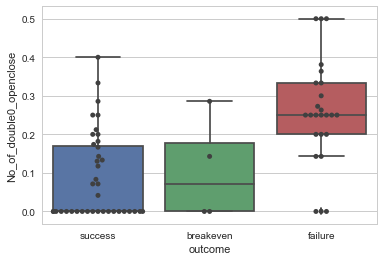

In [2495]:
ax = sns.boxplot(x="outcome", y="No_of_double0_openclose", data=h12_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_openclose", data=h12_data, color=".25")

In [2496]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_openclose_h12=h12_data.loc[h12_data['outcome'] == "success",'No_of_double0_openclose']
failure_openclose_h12=h12_data.loc[h12_data['outcome'] == "failure",'No_of_double0_openclose']

print("Avg number of double 0s for success set: %f" % success_openclose_h12.mean())
print("Avg number of double 0s for failure set: %f" % failure_openclose_h12.mean())

#performing paired t-test
stats.ttest_ind(a= success_openclose_h12,b= failure_openclose_h12,equal_var=False)

Avg number of double 0s for success set: 0.088351
Avg number of double 0s for failure set: 0.255314


Ttest_indResult(statistic=-5.0917796473079378, pvalue=7.1703362249497407e-06)

And these are the whiskers of the boxplots:

In [2497]:
(s_oc_uwhisker_h12,s_oc_lwhisker_h12)=get_whiskers(success_openclose_h12.values)

#### Stretch
##### high

outcome       breakeven  failure  success
stretch_high                             
0                     3        7       26
2                     1        9        6
3                     0        6        6
4                     0        2        1
5                     0        1        0


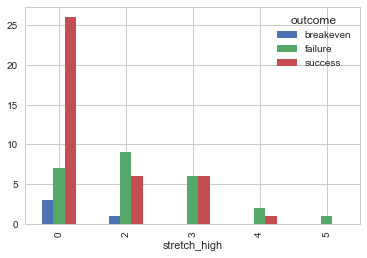

In [2560]:
datatable=pd.crosstab(h12_data['stretch_high'], h12_data['outcome'], rownames=['stretch_high'])
print(datatable)
datatable.plot(kind="bar")

In [2499]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_high_h12=h12_data.loc[h12_data['outcome'] == "success",'stretch_high']
failure_stretch_high_h12=h12_data.loc[h12_data['outcome'] == "failure",'stretch_high']

print("Avg stretch of 0s for success set: %f" % success_stretch_high_h12.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_high_h12.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_high_h12,b=failure_stretch_high_h12,equal_var=False)

Avg stretch of 0s for success set: 0.871795
Avg stretch of 0s for failure set: 1.960000


Ttest_indResult(statistic=-3.0373522911907416, pvalue=0.0038856290838799783)

##### low

outcome      breakeven  failure  success
stretch_low                             
0                    3        2       22
2                    1       10       10
3                    0        6        6
4                    0        2        0
5                    0        3        0
6                    0        2        0
7                    0        0        1


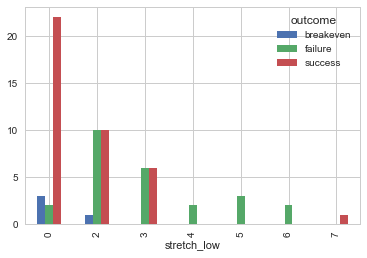

In [2561]:
datatable=pd.crosstab(h12_data['stretch_low'], h12_data['outcome'], rownames=['stretch_low'])
print(datatable)
datatable.plot(kind="bar")

In [2501]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_low_h12=h12_data.loc[h12_data['outcome'] == "success",'stretch_low']
failure_stretch_low_h12=h12_data.loc[h12_data['outcome'] == "failure",'stretch_low']

print("Avg stretch of 0s for success set: %f" % success_stretch_low_h12.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_low_h12.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_low_h12,b=failure_stretch_low_h12,equal_var=False)

Avg stretch of 0s for success set: 1.153846
Avg stretch of 0s for failure set: 2.920000


Ttest_indResult(statistic=-4.3990730288211459, pvalue=5.6141375475723284e-05)

##### open

outcome       breakeven  failure  success
stretch_open                             
0                     2        8       21
2                     1        9       12
3                     1        5        5
4                     0        2        1
5                     0        1        0


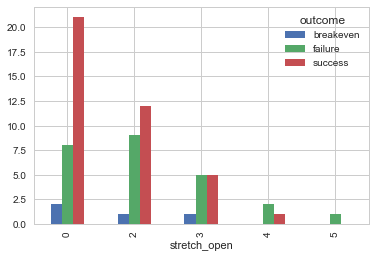

In [2562]:
datatable=pd.crosstab(h12_data['stretch_open'], h12_data['outcome'], rownames=['stretch_open'])
print(datatable)
datatable.plot(kind="bar")

In [2503]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_open_h12=h12_data.loc[h12_data['outcome'] == "success",'stretch_open']
failure_stretch_open_h12=h12_data.loc[h12_data['outcome'] == "failure",'stretch_open']

print("Avg stretch of 0s for success set: %f" % success_stretch_open_h12.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_open_h12.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_open_h12,b=failure_stretch_open_h12,equal_var=False)

Avg stretch of 0s for success set: 1.102564
Avg stretch of 0s for failure set: 1.840000


Ttest_indResult(statistic=-2.041420896447411, pvalue=0.047044972617585577)

##### close

outcome        breakeven  failure  success
stretch_close                             
0                      2        3       20
2                      1       14       11
3                      1        4        6
4                      0        2        2
5                      0        2        0


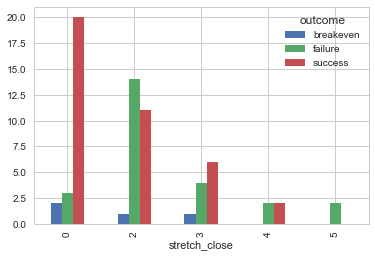

In [2563]:
datatable=pd.crosstab(h12_data['stretch_close'], h12_data['outcome'], rownames=['stretch_close'])
print(datatable)
datatable.plot(kind="bar")

In [2505]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_close_h12=h12_data.loc[h12_data['outcome'] == "success",'stretch_close']
failure_stretch_close_h12=h12_data.loc[h12_data['outcome'] == "failure",'stretch_close']

print("Avg stretch of 0s for success set: %f" % success_stretch_close_h12.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_close_h12.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_close_h12,b=failure_stretch_close_h12,equal_var=False)

Avg stretch of 0s for success set: 1.230769
Avg stretch of 0s for failure set: 2.320000


Ttest_indResult(statistic=-3.2318448248759348, pvalue=0.002103602163789524)

##### colour

outcome         breakeven  failure  success
stretch_colour                             
0                       2        3       20
2                       0       14       11
3                       2        4        6
4                       0        3        2
5                       0        1        0


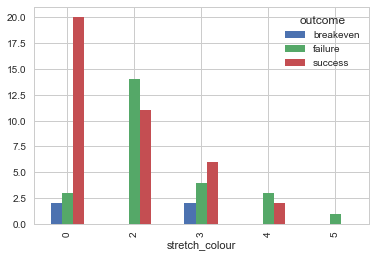

In [2564]:
datatable=pd.crosstab(h12_data['stretch_colour'], h12_data['outcome'], rownames=['stretch_colour'])
print(datatable)
datatable.plot(kind="bar")

In [2507]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_colour_h12=h12_data.loc[h12_data['outcome'] == "success",'stretch_colour']
failure_stretch_colour_h12=h12_data.loc[h12_data['outcome'] == "failure",'stretch_colour']

print("Avg stretch of 0s for success set: %f" % success_stretch_colour_h12.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_colour_h12.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_colour_h12,b=failure_stretch_colour_h12,equal_var=False)

Avg stretch of 0s for success set: 1.230769
Avg stretch of 0s for failure set: 2.280000


Ttest_indResult(statistic=-3.2187972223061547, pvalue=0.0021466777567307189)

### H8

In [2508]:
h8_data=filtered_data.loc[filtered_data['timeframe'] == "H8"]

The number of records is:

In [2509]:
print(len(h8_data))

45


#### Merge

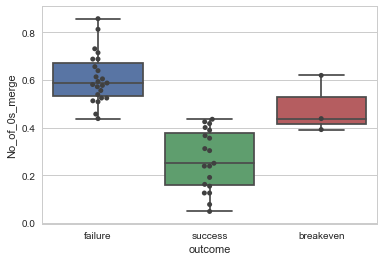

In [2510]:
ax = sns.boxplot(x="outcome", y="No_of_0s_merge", data=h8_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_merge", data=h8_data, color=".25")

In [2511]:
succes_merge_h8=0
failure_merge_h8=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_merge_h8=h8_data.loc[h8_data['outcome'] == "success",'No_of_0s_merge']
failure_merge_h8=h8_data.loc[h8_data['outcome'] == "failure",'No_of_0s_merge']

print("Avg number of 0s for success set: %f" % success_merge_h8.mean())
print("Avg number of 0s for failure set: %f" % failure_merge_h8.mean())

#performing paired t-test
stats.ttest_ind(a= success_merge_h8,b= failure_merge_h8,equal_var=False)

Avg number of 0s for success set: 0.263503
Avg number of 0s for failure set: 0.607262


Ttest_indResult(statistic=-9.4883747786985442, pvalue=3.1372230983292192e-11)

And these are the whiskers of the boxplots:

In [2512]:
(s_merged_uwhisker_h8,s_merged_lwhisker_h8)=get_whiskers(success_merge_h8.values)

#### double0s
##### high_low

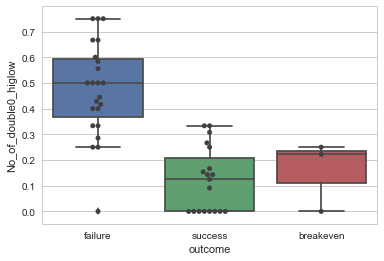

In [2513]:
ax = sns.boxplot(x="outcome", y="No_of_double0_higlow", data=h8_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_higlow", data=h8_data, color=".25")

In [2514]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_highlow_h8=h8_data.loc[h8_data['outcome'] == "success",'No_of_double0_higlow']
failure_highlow_h8=h8_data.loc[h8_data['outcome'] == "failure",'No_of_double0_higlow']

print("Avg number of double 0s for success set: %f" % success_highlow_h8.mean())
print("Avg number of double 0s for failure set: %f" % failure_highlow_h8.mean())

#performing paired t-test
stats.ttest_ind(a= success_highlow_h8,b= failure_highlow_h8,equal_var=False)

Avg number of double 0s for success set: 0.121745
Avg number of double 0s for failure set: 0.472360


Ttest_indResult(statistic=-7.2639988484952109, pvalue=9.7949233934607516e-09)

And these are the whiskers of the boxplots:

In [2515]:
(s_hl_uwhisker_h8,s_hl_lwhisker_h8)=get_whiskers(success_highlow_h8.values)

##### openclose

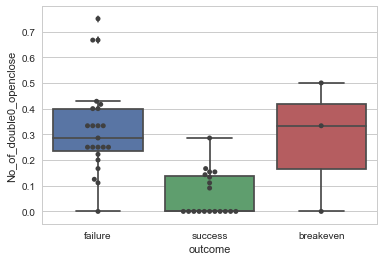

In [2516]:
ax = sns.boxplot(x="outcome", y="No_of_double0_openclose", data=h8_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_openclose", data=h8_data, color=".25")

In [2517]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_openclose_h8=h8_data.loc[h8_data['outcome'] == "success",'No_of_double0_openclose']
failure_openclose_h8=h8_data.loc[h8_data['outcome'] == "failure",'No_of_double0_openclose']

print("Avg number of double 0s for success set: %f" % success_openclose_h8.mean())
print("Avg number of double 0s for failure set: %f" % failure_openclose_h8.mean())

#performing paired t-test
stats.ttest_ind(a= success_openclose_h8,b= failure_openclose_h8,equal_var=False)

Avg number of double 0s for success set: 0.065173
Avg number of double 0s for failure set: 0.322723


Ttest_indResult(statistic=-6.0518062815028406, pvalue=8.4429154754930452e-07)

And these are the whiskers of the boxplots:

In [2518]:
(s_oc_uwhisker_h8,s_oc_lwhisker_h8)=get_whiskers(success_openclose_h8.values)

#### Stretch
##### high

outcome       breakeven  failure  success
stretch_high                             
0                     2        5       11
2                     1        8        7
3                     0        5        1
4                     0        2        0
5                     0        2        0
7                     0        1        0


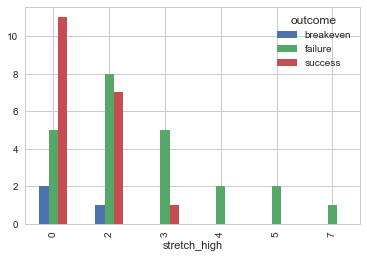

In [2565]:
datatable=pd.crosstab(h8_data['stretch_high'], h8_data['outcome'], rownames=['stretch_high'])
print(datatable)
datatable.plot(kind="bar")

In [2520]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_high_h8=h8_data.loc[h8_data['outcome'] == "success",'stretch_high']
failure_stretch_high_h8=h8_data.loc[h8_data['outcome'] == "failure",'stretch_high']

print("Avg stretch of 0s for success set: %f" % success_stretch_high_h8.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_high_h8.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_high_h8,b=failure_stretch_high_h8,equal_var=False)

Avg stretch of 0s for success set: 0.894737
Avg stretch of 0s for failure set: 2.434783


Ttest_indResult(statistic=-3.3987652892326388, pvalue=0.0016311837360339725)

##### low

outcome      breakeven  failure  success
stretch_low                             
0                    2        4       13
2                    1       10        4
3                    0        4        2
4                    0        2        0
6                    0        3        0


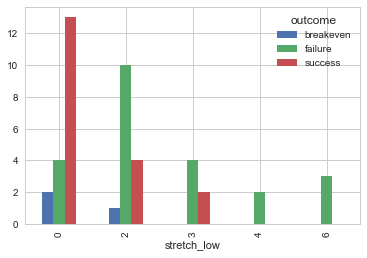

In [2566]:
datatable=pd.crosstab(h8_data['stretch_low'], h8_data['outcome'], rownames=['stretch_low'])
print(datatable)
datatable.plot(kind="bar")

In [2522]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_low_h8=h8_data.loc[h8_data['outcome'] == "success",'stretch_low']
failure_stretch_low_h8=h8_data.loc[h8_data['outcome'] == "failure",'stretch_low']

print("Avg stretch of 0s for success set: %f" % success_stretch_low_h8.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_low_h8.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_low_h8,b=failure_stretch_low_h8,equal_var=False)

Avg stretch of 0s for success set: 0.736842
Avg stretch of 0s for failure set: 2.521739


Ttest_indResult(statistic=-3.9223632785857379, pvalue=0.0003557971962337437)

##### open

outcome       breakeven  failure  success
stretch_open                             
0                     2        6       11
2                     1       13        6
3                     0        3        2
5                     0        1        0


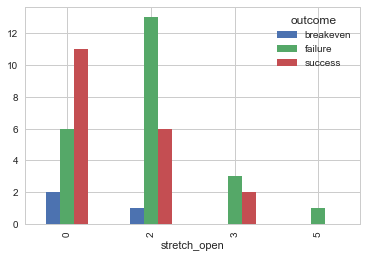

In [2567]:
datatable=pd.crosstab(h8_data['stretch_open'], h8_data['outcome'], rownames=['stretch_open'])
print(datatable)
datatable.plot(kind="bar")

In [2524]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_open_h8=h8_data.loc[h8_data['outcome'] == "success",'stretch_open']
failure_stretch_open_h8=h8_data.loc[h8_data['outcome'] == "failure",'stretch_open']

print("Avg stretch of 0s for success set: %f" % success_stretch_open_h8.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_open_h8.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_open_h8,b=failure_stretch_open_h8,equal_var=False)

Avg stretch of 0s for success set: 0.947368
Avg stretch of 0s for failure set: 1.739130


Ttest_indResult(statistic=-2.1085674104926757, pvalue=0.041410081949058312)

##### close

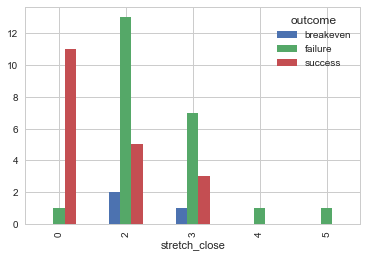

In [2525]:
datatable=pd.crosstab(h8_data['stretch_close'], h8_data['outcome'], rownames=['stretch_close'])
datatable.plot(kind="bar")

In [2526]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_close_h8=h8_data.loc[h8_data['outcome'] == "success",'stretch_close']
failure_stretch_close_h8=h8_data.loc[h8_data['outcome'] == "failure",'stretch_close']

print("Avg stretch of 0s for success set: %f" % success_stretch_close_h8.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_close_h8.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_close_h8,b=failure_stretch_close_h8,equal_var=False)

Avg stretch of 0s for success set: 1.000000
Avg stretch of 0s for failure set: 2.434783


Ttest_indResult(statistic=-4.1296679994966112, pvalue=0.00023206714181767864)

##### colour

outcome         breakeven  failure  success
stretch_colour                             
0                       1        1       11
2                       1       12        6
3                       1        7        2
4                       0        1        0
5                       0        2        0


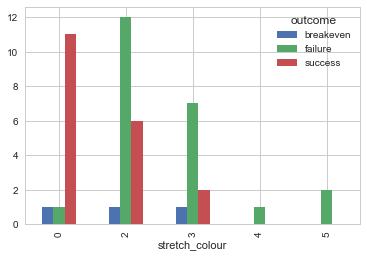

In [2568]:
datatable=pd.crosstab(h8_data['stretch_colour'], h8_data['outcome'], rownames=['stretch_colour'])
print(datatable)
datatable.plot(kind="bar")

In [2528]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_colour_h8=h8_data.loc[h8_data['outcome'] == "success",'stretch_colour']
failure_stretch_colour_h8=h8_data.loc[h8_data['outcome'] == "failure",'stretch_colour']

print("Avg stretch of 0s for success set: %f" % success_stretch_colour_h8.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_colour_h8.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_colour_h8,b=failure_stretch_colour_h8,equal_var=False)

Avg stretch of 0s for success set: 0.947368
Avg stretch of 0s for failure set: 2.565217


Ttest_indResult(statistic=-4.6010379282920999, pvalue=4.7877143211950209e-05)

### H4

In [2529]:
h4_data=filtered_data.loc[filtered_data['timeframe'] == "H4"]

The number of records is:

In [2530]:
print(len(h4_data))

93


#### Merge

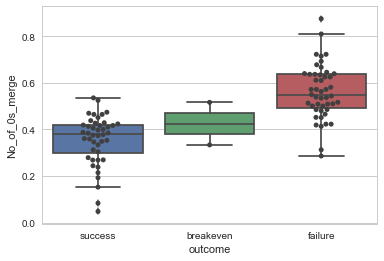

In [2531]:
ax = sns.boxplot(x="outcome", y="No_of_0s_merge", data=h4_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_merge", data=h4_data, color=".25")

In [2532]:
succes_merge_h4=0
failure_merge_h4=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_merge_h4=h4_data.loc[h4_data['outcome'] == "success",'No_of_0s_merge']
failure_merge_h4=h4_data.loc[h4_data['outcome'] == "failure",'No_of_0s_merge']

print("Avg number of 0s for success set: %f" % success_merge_h4.mean())
print("Avg number of 0s for failure set: %f" % failure_merge_h4.mean())

#performing paired t-test
stats.ttest_ind(a= success_merge_h4,b= failure_merge_h4,equal_var=False)

Avg number of 0s for success set: 0.355178
Avg number of 0s for failure set: 0.561454


Ttest_indResult(statistic=-8.8464106752269203, pvalue=7.8342462526898837e-14)

And these are the whiskers of the boxplots:

In [2533]:
(s_merged_uwhisker_h4,s_merged_lwhisker_h4)=get_whiskers(success_merge_h4.values)

#### double0s
##### high_low

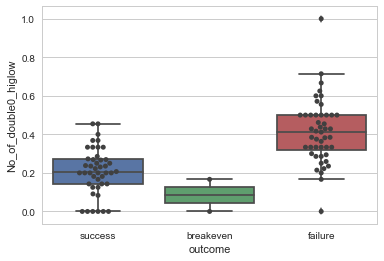

In [2534]:
ax = sns.boxplot(x="outcome", y="No_of_double0_higlow", data=h4_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_higlow", data=h4_data, color=".25")

In [2535]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_highlow_h4=h4_data.loc[h4_data['outcome'] == "success",'No_of_double0_higlow']
failure_highlow_h4=h4_data.loc[h4_data['outcome'] == "failure",'No_of_double0_higlow']

print("Avg number of double 0s for success set: %f" % success_highlow_h4.mean())
print("Avg number of double 0s for failure set: %f" % failure_highlow_h4.mean())

#performing paired t-test
stats.ttest_ind(a= success_highlow_h4,b= failure_highlow_h4,equal_var=False)

Avg number of double 0s for success set: 0.208966
Avg number of double 0s for failure set: 0.412854


Ttest_indResult(statistic=-6.7513597364947699, pvalue=1.7902109571937646e-09)

And these are the whiskers of the boxplots:

In [2536]:
(s_hl_uwhisker_h4,s_hl_lwhisker_h4)=get_whiskers(success_highlow_h4.values)

##### openclose

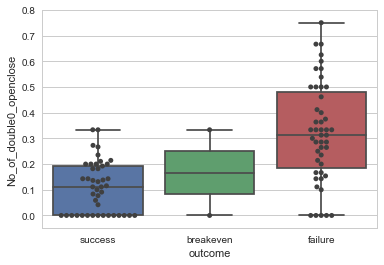

In [2537]:
ax = sns.boxplot(x="outcome", y="No_of_double0_openclose", data=h4_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_openclose", data=h4_data, color=".25")

In [2538]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_openclose_h4=h4_data.loc[h4_data['outcome'] == "success",'No_of_double0_openclose']
failure_openclose_h4=h4_data.loc[h4_data['outcome'] == "failure",'No_of_double0_openclose']

print("Avg number of double 0s for success set: %f" % success_openclose_h4.mean())
print("Avg number of double 0s for failure set: %f" % failure_openclose_h4.mean())

#performing paired t-test
stats.ttest_ind(a= success_openclose_h4,b= failure_openclose_h4,equal_var=False)

Avg number of double 0s for success set: 0.110132
Avg number of double 0s for failure set: 0.323979


/Users/ernesto/bin/anaconda/envs/python3/lib/python3.5/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


Ttest_indResult(statistic=-6.6637122138845228, pvalue=5.1097481534876523e-09)

And these are the whiskers of the boxplots:

In [2539]:
(s_oc_uwhisker_h4,s_oc_lwhisker_h4)=get_whiskers(success_openclose_all.values)

#### Stretch
##### high

outcome       breakeven  failure  success
stretch_high                             
0                     2        5       14
2                     0        8       10
3                     0       20       10
4                     0        9        7
5                     0        4        1
6                     0        1        2


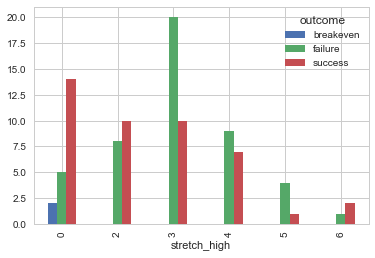

In [2569]:
datatable=pd.crosstab(h4_data['stretch_high'], h4_data['outcome'], rownames=['stretch_high'])
print(datatable)
datatable.plot(kind="bar")

In [2541]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_high_h4=h4_data.loc[h4_data['outcome'] == "success",'stretch_high']
failure_stretch_high_h4=h4_data.loc[h4_data['outcome'] == "failure",'stretch_high']

print("Avg stretch of 0s for success set: %f" % success_stretch_high_h4.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_high_h4.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_high_h4,b=failure_stretch_high_h4,equal_var=False)

Avg stretch of 0s for success set: 2.159091
Avg stretch of 0s for failure set: 2.936170


Ttest_indResult(statistic=-2.3332831210997504, pvalue=0.022107504908254895)

##### low

outcome      breakeven  failure  success
stretch_low                             
0                    1        4       19
2                    0       14       13
3                    1       18        6
4                    0        5        4
5                    0        5        2
6                    0        1        0


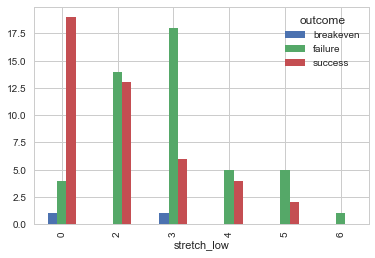

In [2570]:
datatable=pd.crosstab(h4_data['stretch_low'], h4_data['outcome'], rownames=['stretch_low'])
print(datatable)
datatable.plot(kind="bar")

In [2543]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_low_h4=h4_data.loc[h4_data['outcome'] == "success",'stretch_low']
failure_stretch_low_h4=h4_data.loc[h4_data['outcome'] == "failure",'stretch_low']

print("Avg stretch of 0s for success set: %f" % success_stretch_low_h4.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_low_h4.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_low_h4,b=failure_stretch_low_h4,equal_var=False)

Avg stretch of 0s for success set: 1.590909
Avg stretch of 0s for failure set: 2.829787


Ttest_indResult(statistic=-4.0059409858935027, pvalue=0.00013254530766521955)

##### open

outcome       breakeven  failure  success
stretch_open                             
0                     1        7       18
2                     1       14       11
3                     0       14        9
4                     0       10        6
5                     0        1        0
6                     0        1        0


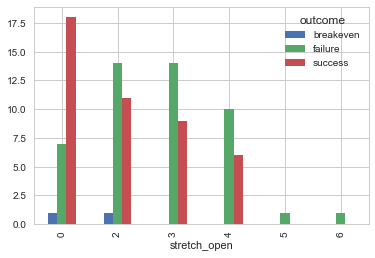

In [2571]:
datatable=pd.crosstab(h4_data['stretch_open'], h4_data['outcome'], rownames=['stretch_open'])
print(datatable)
datatable.plot(kind="bar")

In [2545]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_open_h4=h4_data.loc[h4_data['outcome'] == "success",'stretch_open']
failure_stretch_open_h4=h4_data.loc[h4_data['outcome'] == "failure",'stretch_open']

print("Avg stretch of 0s for success set: %f" % success_stretch_open_h4.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_open_h4.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_open_h4,b=failure_stretch_open_h4,equal_var=False)

Avg stretch of 0s for success set: 1.659091
Avg stretch of 0s for failure set: 2.574468


Ttest_indResult(statistic=-2.9681412043184423, pvalue=0.0038673519710562838)

##### close

outcome        breakeven  failure  success
stretch_close                             
0                      1        5       17
2                      0       13       15
3                      1       11        7
4                      0       11        5
5                      0        5        0
6                      0        1        0
7                      0        1        0


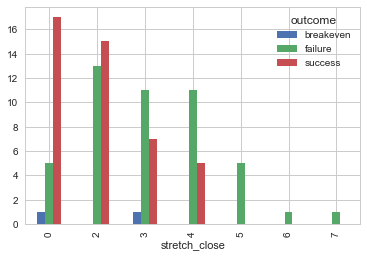

In [2572]:
datatable=pd.crosstab(h4_data['stretch_close'], h4_data['outcome'], rownames=['stretch_close'])
print(datatable)
datatable.plot(kind="bar")

In [2547]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_close_h4=h4_data.loc[h4_data['outcome'] == "success",'stretch_close']
failure_stretch_close_h4=h4_data.loc[h4_data['outcome'] == "failure",'stretch_close']

print("Avg stretch of 0s for success set: %f" % success_stretch_close_h4.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_close_h4.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_close_h4,b=failure_stretch_close_h4,equal_var=False)

Avg stretch of 0s for success set: 1.613636
Avg stretch of 0s for failure set: 3.000000


Ttest_indResult(statistic=-4.39575707383481, pvalue=3.0458176519825966e-05)

##### colour

outcome         breakeven  failure  success
stretch_colour                             
0                       1        5       15
2                       0       12       17
3                       1       12        8
4                       0       10        4
5                       0        6        0
6                       0        1        0
7                       0        1        0


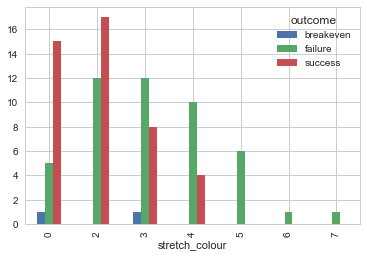

In [2573]:
datatable=pd.crosstab(h4_data['stretch_colour'], h4_data['outcome'], rownames=['stretch_colour'])
print(datatable)
datatable.plot(kind="bar")

In [2549]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_colour_h4=h4_data.loc[h4_data['outcome'] == "success",'stretch_colour']
failure_stretch_colour_h4=h4_data.loc[h4_data['outcome'] == "failure",'stretch_colour']

print("Avg stretch of 0s for success set: %f" % success_stretch_colour_h4.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_colour_h4.mean())

#performing paired t-test# 
stats.ttest_ind(a=success_stretch_colour_h4,b=failure_stretch_colour_h4,equal_var=False)

Avg stretch of 0s for success set: 1.681818
Avg stretch of 0s for failure set: 3.042553


Ttest_indResult(statistic=-4.3996037686059033, pvalue=3.0204814206730304e-05)

# Conclusions

## Comparison for merged number of 0s

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_merge_all.mean()}} | {{'%.2f' % failure_merge_all.mean()}}
D     | {{'%.2f' % success_merge_d.mean()}} | {{'%.2f' % failure_merge_d.mean()}}
H12   | {{'%.2f' % success_merge_h12.mean()}} | {{'%.2f' % failure_merge_h12.mean()}}
H8    | {{'%.2f' % success_merge_h8.mean()}} | {{'%.2f' % failure_merge_h8.mean()}}
H4    | {{'%.2f' % success_merge_h4.mean()}} | {{'%.2f' % failure_merge_h4.mean()}}

### Proposed threshold
Based on the upper whisker of the boxplot

type  | threshold                      
----- | ----------------------------- 
all   | {{'%.2f' % s_merged_uwhisker_all}} 
D     | {{'%.2f' % s_merged_uwhisker_d}}
H12   | {{'%.2f' % s_merged_uwhisker_h12}}
H8    | {{'%.2f' % s_merged_uwhisker_h8}}
H4    | {{'%.2f' % s_merged_uwhisker_h4}}

**Conclusion:** {{'%.2f' % s_merged_uwhisker_all}} will be the cut off



## Comparison for double 0s
### highlow

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_highlow_all.mean()}} | {{'%.2f' % failure_highlow_all.mean()}}
D     | {{'%.2f' % success_highlow_d.mean()}} | {{'%.2f' % failure_highlow_d.mean()}}
H12   | {{'%.2f' % success_highlow_h12.mean()}} | {{'%.2f' % failure_highlow_h12.mean()}}
H8    | {{'%.2f' % success_highlow_h8.mean()}} | {{'%.2f' % failure_highlow_h8.mean()}}
H4    | {{'%.2f' % success_highlow_h4.mean()}} | {{'%.2f' % failure_highlow_h4.mean()}}

#### Proposed threshold
Based on the upper whisker of the boxplot

type  | threshold                      
----- | ----------------------------- 
all   | {{'%.2f' % s_hl_uwhisker_all}} 
D     | {{'%.2f' % s_hl_uwhisker_d}}
H12   | {{'%.2f' % s_hl_uwhisker_h12}}
H8    | {{'%.2f' % s_hl_uwhisker_h8}}
H4    | {{'%.2f' % s_hl_uwhisker_h4}}

**Conclusion:** {{'%.2f' % s_hl_uwhisker_all}} will be the cut off


### openclose

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_openclose_all.mean()}} | {{'%.2f' % failure_openclose_all.mean()}}
D     | {{'%.2f' % success_openclose_d.mean()}} | {{'%.2f' % failure_openclose_d.mean()}}
H12   | {{'%.2f' % success_openclose_h12.mean()}} | {{'%.2f' % failure_openclose_h12.mean()}}
H8    | {{'%.2f' % success_openclose_h8.mean()}} | {{'%.2f' % failure_openclose_h8.mean()}}
H4    | {{'%.2f' % success_openclose_h4.mean()}} | {{'%.2f' % failure_openclose_h4.mean()}}

#### Proposed threshold
Based on the upper whisker of the boxplot

type  | threshold                      
----- | ----------------------------- 
all   | {{'%.2f' % s_oc_uwhisker_all}} 
D     | {{'%.2f' % s_oc_uwhisker_d}}
H12   | {{'%.2f' % s_oc_uwhisker_h12}}
H8    | {{'%.2f' % s_oc_uwhisker_h8}}
H4    | {{'%.2f' % s_oc_uwhisker_h4}}

**Conclusion:** {{'%.2f' % s_oc_uwhisker_all}} will be the cut off

## Stretch

**Conclusion:** Based on the barplots and crosstables calculated above, a stretch of **>=3** 0s will be chosen as the cut off point

### high

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_stretch_high_all.mean()}} | {{'%.2f' % failure_stretch_high_all.mean()}}
D     | {{'%.2f' % success_stretch_high_d.mean()}} | {{'%.2f' % failure_stretch_high_d.mean()}}
H12   | {{'%.2f' % success_stretch_high_h12.mean()}} | {{'%.2f' % failure_stretch_high_h12.mean()}}
H8    | {{'%.2f' % success_stretch_high_h8.mean()}} | {{'%.2f' % failure_stretch_high_h8.mean()}}
H4    | {{'%.2f' % success_stretch_high_h4.mean()}} | {{'%.2f' % failure_stretch_high_h4.mean()}}


### low

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_stretch_low_all.mean()}} | {{'%.2f' % failure_stretch_low_all.mean()}}
D     | {{'%.2f' % success_stretch_low_d.mean()}} | {{'%.2f' % failure_stretch_low_d.mean()}}
H12   | {{'%.2f' % success_stretch_low_h12.mean()}} | {{'%.2f' % failure_stretch_low_h12.mean()}}
H8    | {{'%.2f' % success_stretch_low_h8.mean()}} | {{'%.2f' % failure_stretch_low_h8.mean()}}
H4    | {{'%.2f' % success_stretch_low_h4.mean()}} | {{'%.2f' % failure_stretch_low_h4.mean()}}

### open

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_stretch_open_all.mean()}} | {{'%.2f' % failure_stretch_open_all.mean()}}
D     | {{'%.2f' % success_stretch_open_d.mean()}} | {{'%.2f' % failure_stretch_open_d.mean()}}
H12   | {{'%.2f' % success_stretch_open_h12.mean()}} | {{'%.2f' % failure_stretch_open_h12.mean()}}
H8    | {{'%.2f' % success_stretch_open_h8.mean()}} | {{'%.2f' % failure_stretch_open_h8.mean()}}
H4    | {{'%.2f' % success_stretch_open_h4.mean()}} | {{'%.2f' % failure_stretch_open_h4.mean()}}

### close

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_stretch_close_all.mean()}} | {{'%.2f' % failure_stretch_close_all.mean()}}
D     | {{'%.2f' % success_stretch_close_d.mean()}} | {{'%.2f' % failure_stretch_close_d.mean()}}
H12   | {{'%.2f' % success_stretch_close_h12.mean()}} | {{'%.2f' % failure_stretch_close_h12.mean()}}
H8    | {{'%.2f' % success_stretch_close_h8.mean()}} | {{'%.2f' % failure_stretch_close_h8.mean()}}
H4    | {{'%.2f' % success_stretch_close_h4.mean()}} | {{'%.2f' % failure_stretch_close_h4.mean()}}

### colour

type  | success                       | failure
----- | ----------------------------- | --------------------------
all   | {{'%.2f' % success_stretch_colour_all.mean()}} | {{'%.2f' % failure_stretch_colour_all.mean()}}
D     | {{'%.2f' % success_stretch_colour_d.mean()}} | {{'%.2f' % failure_stretch_colour_d.mean()}}
H12   | {{'%.2f' % success_stretch_colour_h12.mean()}} | {{'%.2f' % failure_stretch_colour_h12.mean()}}
H8    | {{'%.2f' % success_stretch_colour_h8.mean()}} | {{'%.2f' % failure_stretch_colour_h8.mean()}}
H4    | {{'%.2f' % success_stretch_colour_h4.mean()}} | {{'%.2f' % failure_stretch_colour_h4.mean()}}